# Visualisation of Decision Trees

In this practice we are going to build with the iris data, used in other practices, a small model of decision trees and random forest to make the graphical representation and compare results.

### Import Libraries

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

### Load Data

We load the already known iris data and separate the X variables from the y target.

In [3]:
iris = load_iris()
X = iris.data
y = iris.target
y_names = iris.target_names

### Split Data

In [4]:
perc_values = [0.7, 0.15, 0.15];

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=perc_values[1] + perc_values[2], random_state=1);

We visualise the size of the datasets.

In [6]:
print('Train data size = ' + str(X_train.shape))
print('Train target size = ' + str(y_train.shape))
print('Test data size = ' + str(X_test.shape))
print('Test target size = ' + str(y_test.shape))

Train data size = (105, 4)
Train target size = (105,)
Test data size = (45, 4)
Test target size = (45,)


### Visualization

We import sklearn's tree library which has functions for decision tree visualisation.

In [7]:
from sklearn import tree

In [8]:
clf = tree.DecisionTreeClassifier(random_state = 1)
clf = clf.fit(X_train, y_train)

1) We visualise with plot_tree with the trained model.

[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.2, 0.5, 'x[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

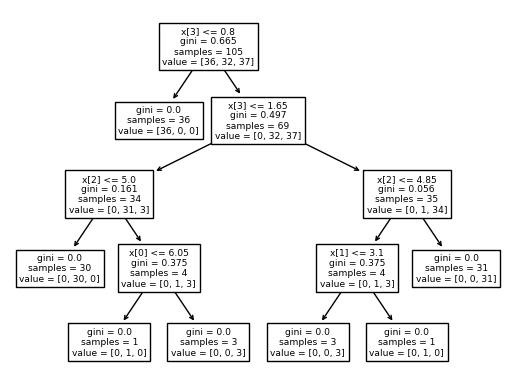

In [9]:
tree.plot_tree(clf.fit(X_train, y_train))

The output will be:
    
- The decision rules that make up the tree together with their characteristics, e.g. the gini index, and the number of patterns on each branch.

- A graphical representation of the tree.

2) As the first representation does not look very good, there are other functions and libraries to represent trees.

We import the ghraphiv library which is used to visualise decision trees and  use the tree's *export_graphviz* function for the representation

In [10]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Interpretation

Our root node will be the variable petal width.

He has divided it into the following rule petal width <= 0.8 cm. And 2 branches or decisions have been created:

- TRUE: petal width <= 0,8 cm (here the tree ends, gini index = 0).

- FALSE: petal width > 0,8 cm (here the tree keeps growing)


We also get data on the gini index, the number of patterns we have in that node (in this case, as the root node is all of them), the heats it takes and the class it predicts.

In the child node FALSE the tree keeps iterating and growing, the next variable chosen in AMS to make the decision is petal width again, petal width<= 1.75.

Following a similar logic to the previous one, we can explain each of the rules that the model has followed to explain the result.

### Prediction & Evaluation

In [11]:
y_pred = clf.predict(X_test)

We import the library to make the confusion matrix and the accuracy.

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc

In [13]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [14]:
acc(y_test, y_pred)

0.9555555555555556

### Final Conclusions

- Decision trees are easy to interpret.

- They do not require normalisation.

- They accept categorical variables.

- In this example it works well because it is a very simple dataset.